In [8]:
from environments import maze
from agents import qlearn, dynaq, po_qlearn, po_dynaq
from pomdp import *
from plotnine import *
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd

n_rats = 20 # number of 'stats rats' per group
env = maze() # define environment (perceptually aliased gridworld maze)

In [2]:
# POMDP that approximates the maze task
obs_noise = 0
trs_noise = [0, 0.001, 0.01, 0.1]

maze_pomdp_list = []

for k in range(4):
    # copy arrays from the real task POMDP
    A = env.pomdp.A
    B = env.pomdp.B
    R = env.pomdp.R
    # add transition noise
    for i in range(11):
        for j in range(4):
            numerator = A[i, :, j] + trs_noise[k]
            A[i, :, j] = numerator/np.sum(numerator)
    # add observation noise
    for i in range(11):
        for j in range(4):
            numerator = B[i, :, j] + obs_noise
            B[i, :, j] = numerator/np.sum(numerator)
    # create POMDP for agents to use
    maze_pomdp_list += [pomdp(A = A, B = B, R = R)]

/home/sam/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/sam/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/sam/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/sam/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be remov

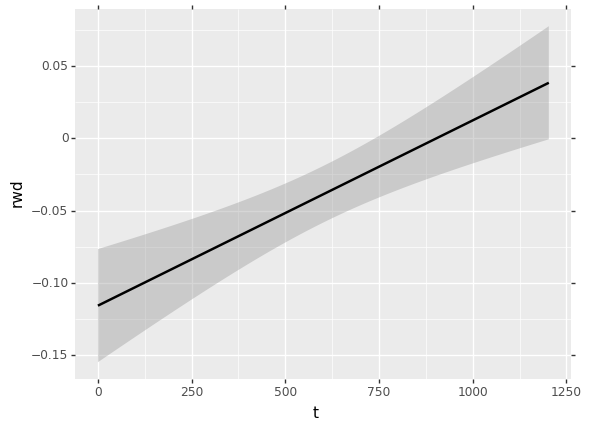

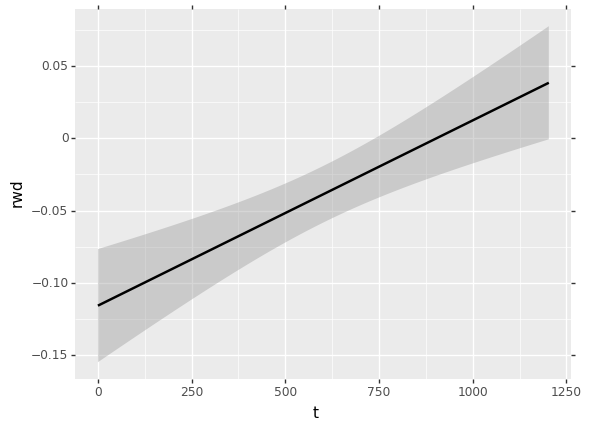

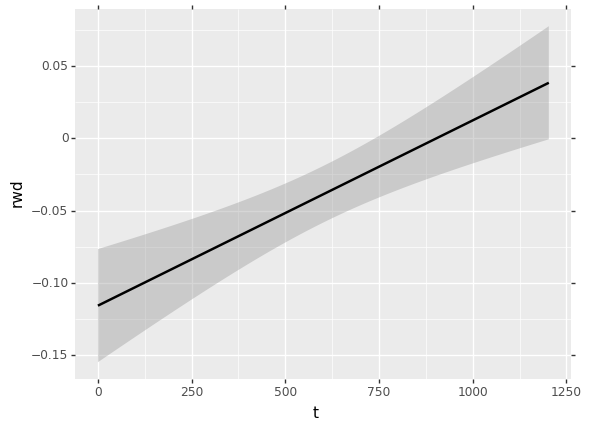

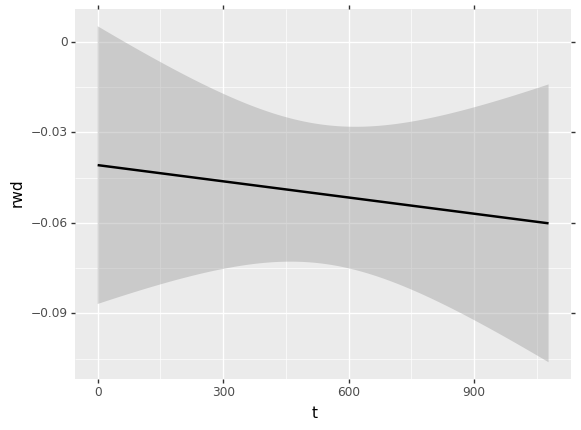

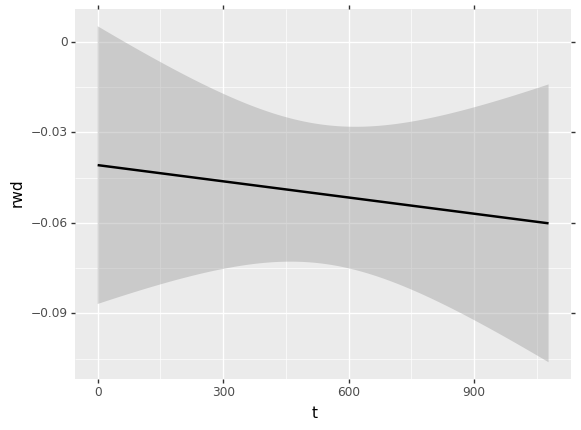

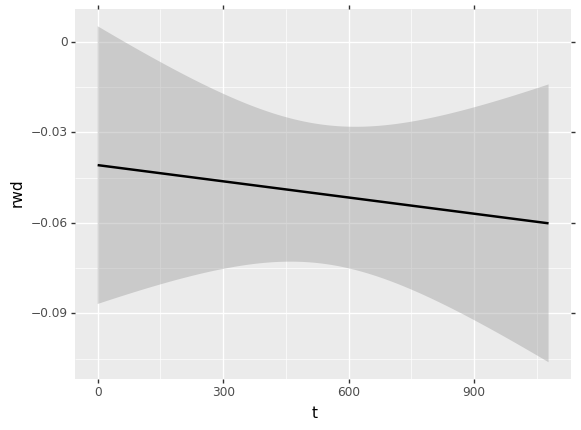

In [3]:
# Simulate regular q-learning.
model = qlearn(env = env, learning_rate = 0.1, epsilon = 0.05, gamma = 0.5)
model.learn(100)
model.plot(span = 0.3)
model.plot(span = 0.5)
model.plot(span = 0.7)
# Simulate POMDP q-learning.
model = po_qlearn(env = env, pomdp = maze_pomdp_list[0], learning_rate = 0.1, epsilon = 0.05, gamma = 0.5)
model.learn(100)
model.plot(span = 0.3)
model.plot(span = 0.5)
model.plot(span = 0.7)

In [1]:
# Compare regular and belief state Q learning.
rwd0 = []
rwd1 = []
for i in range(n_rats):
    model = qlearn(env = env, learning_rate = 0.1, epsilon = 0.05, gamma = 0.8)
    model.learn(1000)
    rwd0 += [model.rwd_list.mean()]
    model = po_qlearn(env = env, pomdp = maze_pomdp_list[0], learning_rate = 0.1, epsilon = 0.05, gamma = 0.8)
    model.learn(1000)
    rwd1 += [model.rwd_list.mean()]
    
df = pd.DataFrame({'avg_rwd' : rwd0 + rwd1, 'model' : n_rats*['Q-learning'] + n_rats*['belief state Q-learning']})
p = (ggplot(df, aes('model', 'avg_rwd'))
 + geom_boxplot())
p.draw()

NameError: name 'n_rats' is not defined

/home/sam/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/sam/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


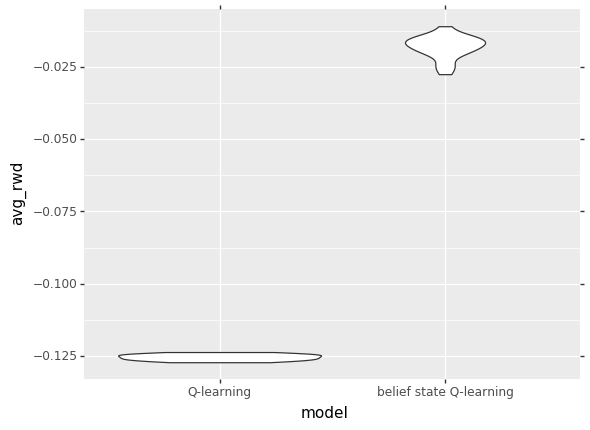

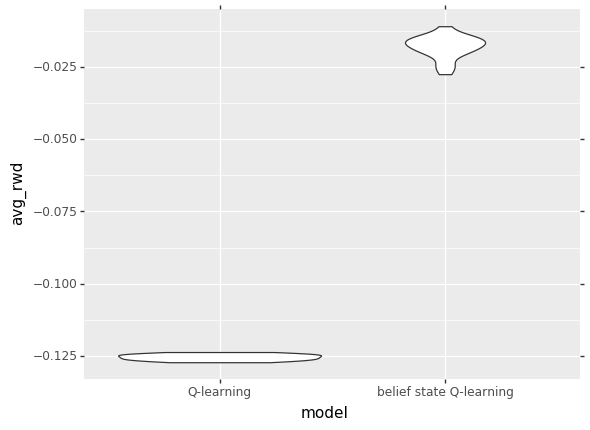

In [16]:
df = pd.DataFrame({'avg_rwd' : rwd0 + rwd1, 'model' : n_rats*['Q-learning'] + n_rats*['belief state Q-learning']})
p = (ggplot(df, aes('model', 'avg_rwd'))
 + geom_violin())
p.draw()
print(np.round(ttest_ind(rwd0, rwd1).statistic, 2))
print(np.round(ttest_ind(rwd0, rwd1).pvalue, 4))

In [4]:
# Compare levels of noise in the model.
rwd0 = [] # no noise
rwd1 = [] # noise level 1
rwd2 = [] # noise level 2
rwd3 = [] # noise level 3
# FINISH
for i in range(n_rats):
    model = po_qlearn(env = env, pomdp = maze_pomdp_list[0], learning_rate = 0.1, epsilon = 0.05, gamma = 0.8)
    model.learn(1000)
    rwd0 += [model.rwd_list.mean()]
    model = po_qlearn(env = env, pomdp = maze_pomdp_list[1], learning_rate = 0.1, epsilon = 0.05, gamma = 0.8)
    model.learn(1000)
    rwd1 += [model.rwd_list.mean()]
    model = po_qlearn(env = env, pomdp = maze_pomdp_list[2], learning_rate = 0.1, epsilon = 0.05, gamma = 0.8)
    model.learn(1000)
    rwd2 += [model.rwd_list.mean()]
    model = po_qlearn(env = env, pomdp = maze_pomdp_list[3], learning_rate = 0.1, epsilon = 0.05, gamma = 0.8)
    model.learn(1000)
    rwd3 += [model.rwd_list.mean()]

df = pd.DataFrame({'avg_rwd' : rwd0 + rwd1 + rwd2 + rwd3, 'noise level' : n_rats*['0'] + n_rats*['0.001'] + n_rats*['0.01'] + n_rats*['0.1']})
p = (ggplot(df, aes('noise level', 'avg_rwd'))
 + geom_boxplot())
#p.draw()

/home/sam/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/sam/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


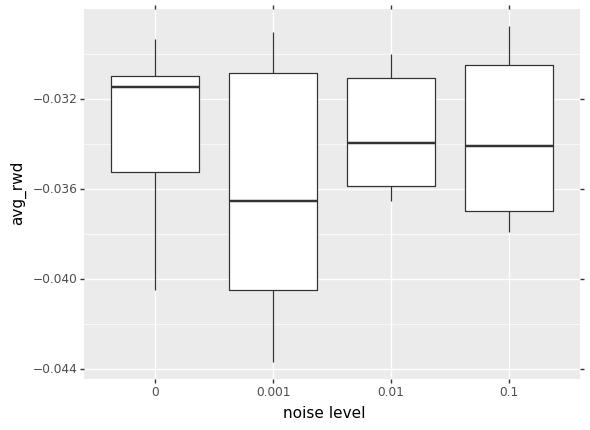

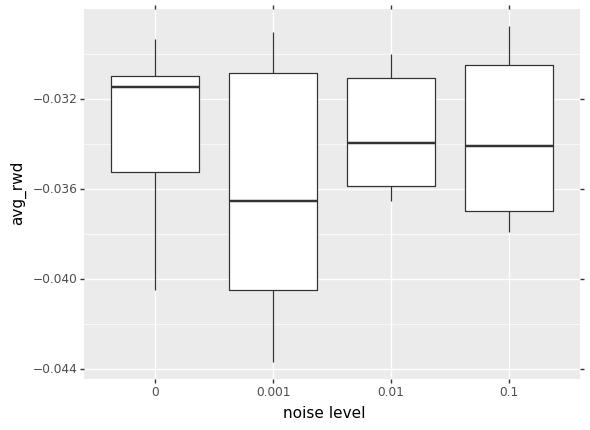